# Context 

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.




# Loading : Environment  & data

In [2]:
import pandas as pd
import numpy as np
''' Data visualisation'''
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
''' Scikit-Learn'''
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate ,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import set_config

set_config(display='diagram')
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.metrics import confusion_matrix

''' Imbalanced Classes'''
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
#load data 
df= pd.read_csv('../CreditCardFraudDetection/data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# EDA

In [5]:
data = df.copy()
# data info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# data distribution 
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
#missing values 
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#duplicates
print('nb of rows before duplicates :', len(data))
duplicates= data.duplicated()
print('nb of duplicated rows :', duplicates.sum())
data.drop_duplicates(inplace=True)
print('nb of rows after removing duplicates :', len(data))


nb of rows before duplicates : 284807
nb of duplicated rows : 1081
nb of rows after removing duplicates : 283726


# Feature engineering 

Notice, the dataset contains only numerical input variables which are the result of a PCA transformation.

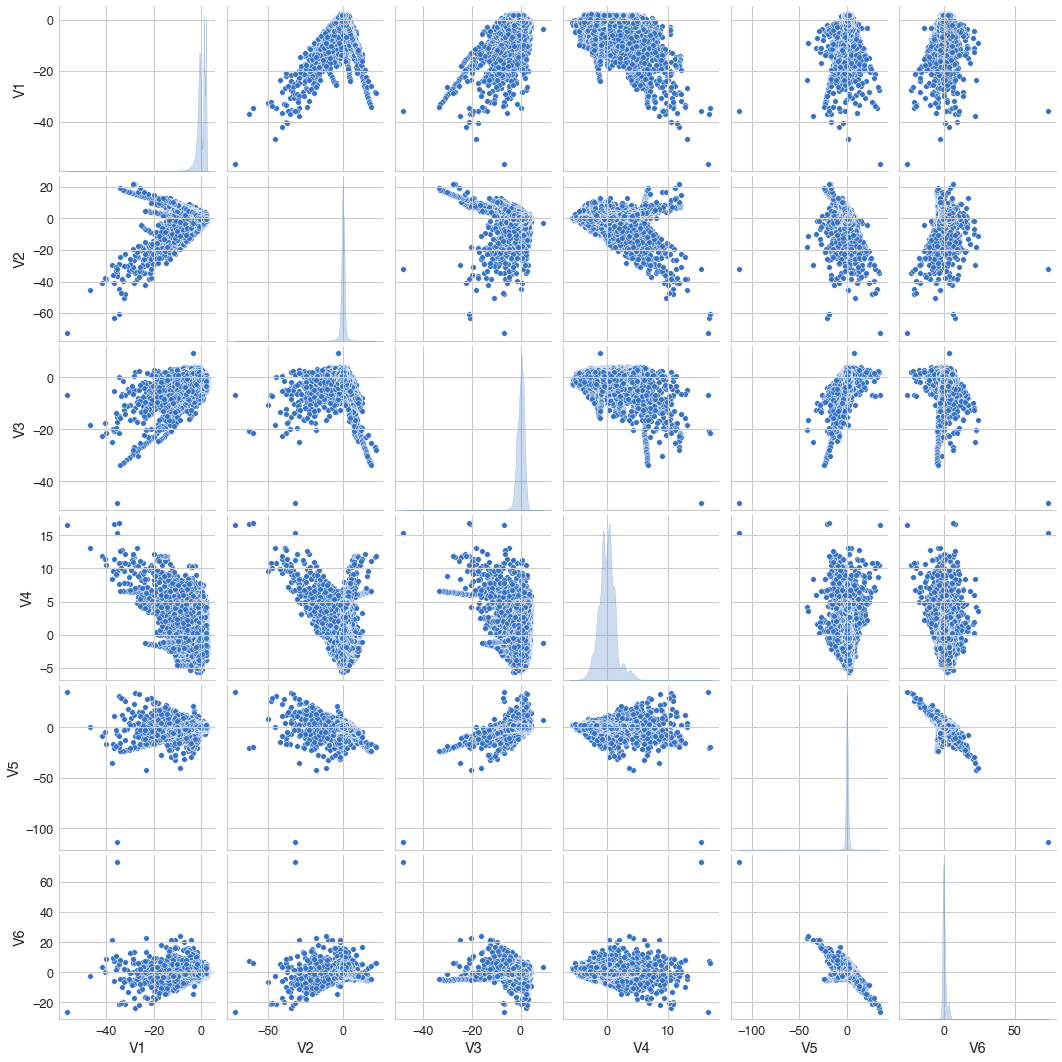

In [9]:
sns.pairplot(data.iloc[:, 1:7], diag_kind='kde')

In [10]:
#features and labels split 
X= data.drop(columns=['Class'])
y= data.Class

0    283253
1       473
Name: Class, dtype: int64


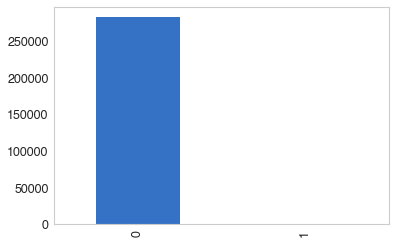

In [11]:
#Class column classes
print(y.value_counts())
y.value_counts().plot(kind="bar") 
plt.grid()

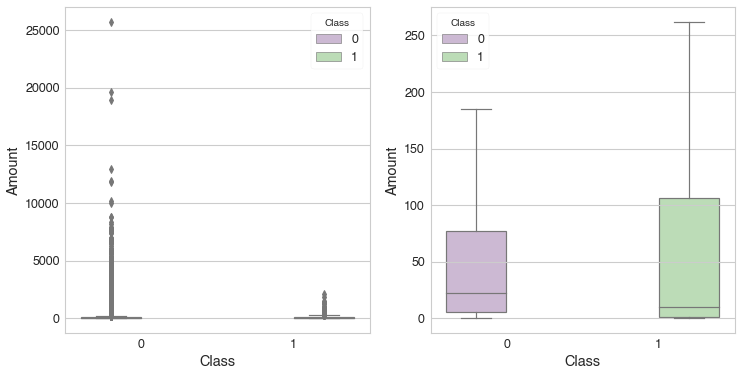

In [12]:
#amounts vs classes 
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=data, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=data, palette="PRGn",showfliers=False)
plt.show();

In [13]:
#Standard scale num columns 
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)

# Models

In [14]:
#train test split
X_train, X_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
# models sklearn import
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb

In [16]:
from sklearn.metrics import accuracy_score

unique, counts = np.unique(y_train, return_counts=True)
counts = dict(zip(unique, counts))
print('Number of labels in train set', counts)

y_pred = 0 if counts[0] > counts[1] else 1

print('Baseline accuracy: ', accuracy_score(y_test, [y_pred]*len(y_test)))

Number of labels in train set {0: 226597, 1: 383}
Baseline accuracy:  0.998413985126705


In [17]:
#baseline AUC
from sklearn.metrics import roc_auc_score
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
print('Baseline ROC_AUC: ', ns_auc)

Baseline ROC_AUC:  0.5


In [ ]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "XGBoost"
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, class_weight='balanced'),
    SVC(gamma=2, C=1, class_weight='balanced'),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5, class_weight='balanced'),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, class_weight='balanced'),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    xgb.XGBClassifier(class_weight='balanced')
]

# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(name, 'accuracy is :', score)
    try:
        roc_auc_score = clf.roc_auc_score(X_test, clf.predict_proba(X_test)[:, 1])
        print(name, ' roc_auc_score is :', roc_auc_score)
    except:
        print(name, ' roc_auc_score is :', None)
    

Nearest Neighbors accuracy is : 0.9995946850879357
Nearest Neighbors  roc_auc_score is : None
Linear SVM accuracy is : 0.9793113170972403
Linear SVM  roc_auc_score is : None


In [18]:
warnings.filterwarnings("ignore")

### Logistic Regression 

In [19]:
#logistic reg 
logreg= LogisticRegression(class_weight='balanced')
results= cross_val_score(logreg,
                         X_train,
                         y_train,
                         cv=5,
                         scoring='roc_auc',
                        verbose =1 
                        )
score_logreg = results.mean()
print('Logistic Regression ROC_AUC Score on validation set : ', score_logreg)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Logistic Regression ROC_AUC Score on validation set :  0.9752879352670647


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.0s finished


In [20]:
# test set 
logreg.fit(X_train, y_train)
preds= logreg.predict(X_test)
probs = logreg.predict_proba(X_test)[:, 1]
print('Logistic Regression ROC_AUC score on test set :', roc_auc_score(y_test, probs))

Logistic Regression ROC_AUC score on test set : 0.9754441032037403


### Random Forest 

In [21]:
rf_clf= RandomForestClassifier(class_weight='balanced')
results= cross_val_score(rf_clf,
                         X_train,
                         y_train,
                         cv=5,
                         scoring='roc_auc',
                         verbose =1 
                        )
score_rf = results.mean()
print('Random Forest ROC_AUC Score on validation set : ', score_rf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Logistic Regression ROC_AUC Score on validation set :  0.9503304467370673


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.5min finished


In [22]:
rf_clf.fit(X_train, y_train)
preds= rf_clf.predict(X_test)
probs = rf_clf.predict_proba(X_test)[:, 1]
print('Random Forest ROC_AUC score on test set :', roc_auc_score(y_test, probs))

Random Forest ROC_AUC score on test set : 0.9317952987228968


### XGBOOST Classifier

In [24]:
xgb_clf= xgb.XGBClassifier(random_state=42)
results= cross_val_score(xgb_clf,
                         X_train,
                         y_train,
                         cv=5,
                         scoring='roc_auc',
                         verbose =1 
                        )
score_xgb = results.mean()
print('XGBoost Classifier ROC_AUC Score on validation set : ', score_xgb)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[23:09:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:09:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:09:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:09:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min finished


In [26]:
xgb_clf.fit(X_train, y_train, eval_metric='logloss')
preds= xgb_clf.predict(X_test)
probs = xgb_clf.predict_proba(X_test)[:, 1]
print('Random Forest ROC_AUC score on test set :', roc_auc_score(y_test, probs))

Random Forest ROC_AUC score on test set : 0.9649677194138504


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

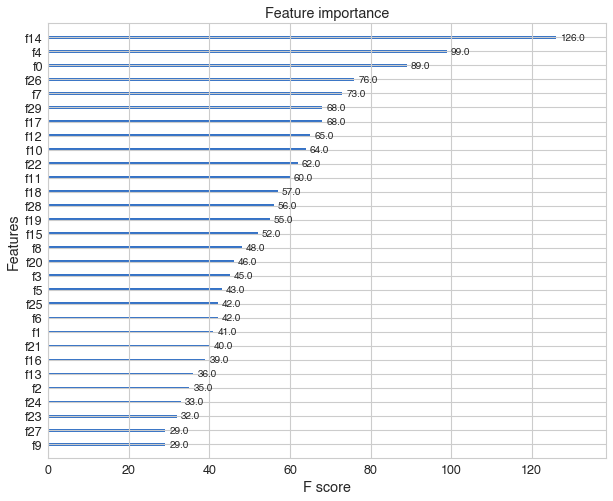

In [31]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 8)

# Plot feature importance
xgb.plot_importance(xgb_clf)


In [37]:
!pip install graphviz

In [35]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 22.0.3
    Uninstalling pip-22.0.3:
      Successfully uninstalled pip-22.0.3


### MLP Classifier

In [52]:
mlp_clf= MLPClassifier(random_state=42)
results= cross_val_score(mlp_clf,
                         X_train,
                         y_train,
                         cv=5,
                         scoring='roc_auc',
                         verbose =1 
                        )
score_mlp = results.mean()
print('MLP Classifier ROC_AUC Score on validation set : ', score_mlp)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MLP Classifier ROC_AUC Score on validation set :  0.9668292885762085


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.4min finished


# Scoring  Review

In [53]:
# On validation set 
# Importing itemgetter
from operator import itemgetter

# Sorting models based on their AUC score from highest to lowest
sorted(
    [('logreg', score_logreg),
    ('rf_clf', score_rf),
    ('xgb_clf', score_xgb), 
    ('mlp_clf', score_mlp)],
    key=itemgetter(1),
    reverse=True
)

[('xgb_clf', 0.9796480000188799),
 ('logreg', 0.9752879352670647),
 ('mlp_clf', 0.9668292885762085),
 ('rf_clf', 0.9503304467370673)]

# Hyperparameters tuning

### Logistic Regression tuning 

In [42]:
logreg.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [58]:
params= {'penalty': ['l1', 'l2','none'],
         'C' : np.logspace(-4, 4, 20),
         'solver' : ['lbfgs','newton-cg','liblinear'],
         'max_iter' : [100, 1000,2500]
        }

search_logreg= RandomizedSearchCV(logreg,
                            param_distributions=params,
                            verbose=1,
                            cv = 3,
                            n_iter=10, 
                            scoring='roc_auc'
                           )
search_logreg.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=LogisticRegression(class_weight='balanced'),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [100, 1000, 2500],
                                        'penalty': ['l1', 'l2', 'none'],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'liblinear']},
                   scoring='roc_auc', verbose=1)

In [59]:
print('best estimator:', search_logreg.best_estimator_)
print('best score', search_logreg.best_score_)

best estimator: LogisticRegression(C=0.0006951927961775605, class_weight='balanced',
                   max_iter=1000)
best score 0.9760378690984345


In [60]:
best_logreg= search_logreg.best_estimator_
best_logreg.fit(X_train, y_train)
probs_logreg = best_logreg.predict_proba(X_test)[:,1]
best_score_logreg= roc_auc_score(y_test, probs_logreg)
print('Best log reg estimator ROC_AUC score:', best_score_logreg)

Best log reg estimator ROC_AUC score: 0.9763669239700021


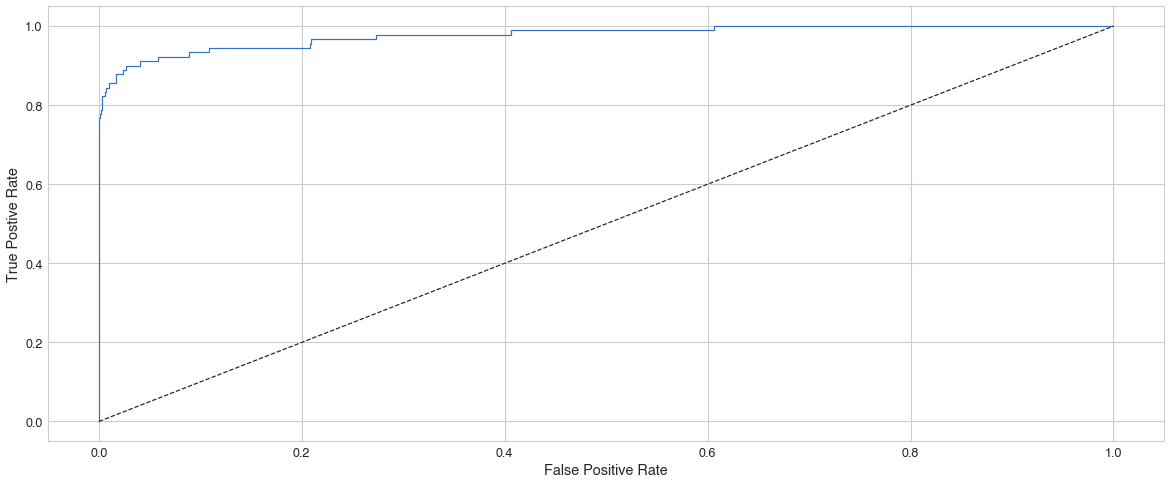

In [68]:
# roc curve 
from sklearn.metrics import roc_curve
fpr, tpr, thresholds= roc_curve(y_test,probs_logreg)

# plot roc curve 
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate')
plt.plot([0,1], [0,1], "k--");

### XGBoost Classifier Tuning 

In [62]:
#parameter grid
rs_param_grid = {
    # max_depth: values from 3 to 12
    'max_depth': list((range(3,7))),
    # alpha: values 0, .001, .01, .1
    'alpha': [0, .001, .01, .1],
    # subsample: values 0.25,0.5,0.75, 1
    'subsample': [0.25,0.5,0.75, 1],
    # learning rate: ten values between 0.01 - 0.5
    'learning_rate': np.linspace(0.01, 0.5, 10),
    # n_estimators: values 10, 25, 40
    'n_estimators': [10, 25, 40]
                    }

# Instantiate RandomizedSearchCV()
xgb_rs= RandomizedSearchCV(estimator=xgb_clf, param_distributions=rs_param_grid,
                           cv= 3, 
                           n_iter= 5, 
                           verbose= 2, 
                           random_state= 42, 
                           scoring= 'roc_auc')
# Train the model on the training set
xgb_rs.fit(X_train, y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[01:45:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END alpha=0.01, learning_rate=0.17333333333333334, max_depth=4, n_estimators=40, subsample=0.75; total time=   3.6s
[01:45:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END alpha=0.01, learning_rate=0.17333333333333334, max_depth=4, n_estimators=40, subsample=0.75; total time=   3.6s
[01:45:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metr

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimat...
                                           tree_method='exact',
                                           validate_parameters=1,
                                           verbosity=None),
                   n_iter=5,
                   param_distributions={'alpha': [0, 0.001, 0.01, 0.1],
                                        'learning_rate': array([0.01      , 0.06444444, 0.11888889, 0.17333333, 0.22777778,
       0.28222222, 0.33666667, 0.39111111, 0.44555556, 0.5       ]),
                                        'max_depth': [3, 4, 5, 6],
                                        'n_estimators': [10, 25, 40],
                                        'subsample': [0.25, 0.5, 0.75, 1]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [63]:
print('best estimator:', xgb_rs.best_estimator_)
print('best score', xgb_rs.best_score_)

best estimator: XGBClassifier(alpha=0.01, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.17333333333333334,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=40, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
              tree_method='exact', validate_parameters=1, verbosity=None)
best score 0.9754931307946473


In [64]:
best_xgb= xgb_rs.best_estimator_
best_xgb.fit(X_train, y_train)
probs_xgb = best_xgb.predict_proba(X_test)[:,1]
best_score_xgb= roc_auc_score(y_test, probs_xgb)
print('Best log reg estimator ROC_AUC score:', best_score_xgb)

[01:49:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best log reg estimator ROC_AUC score: 0.9714182473563652


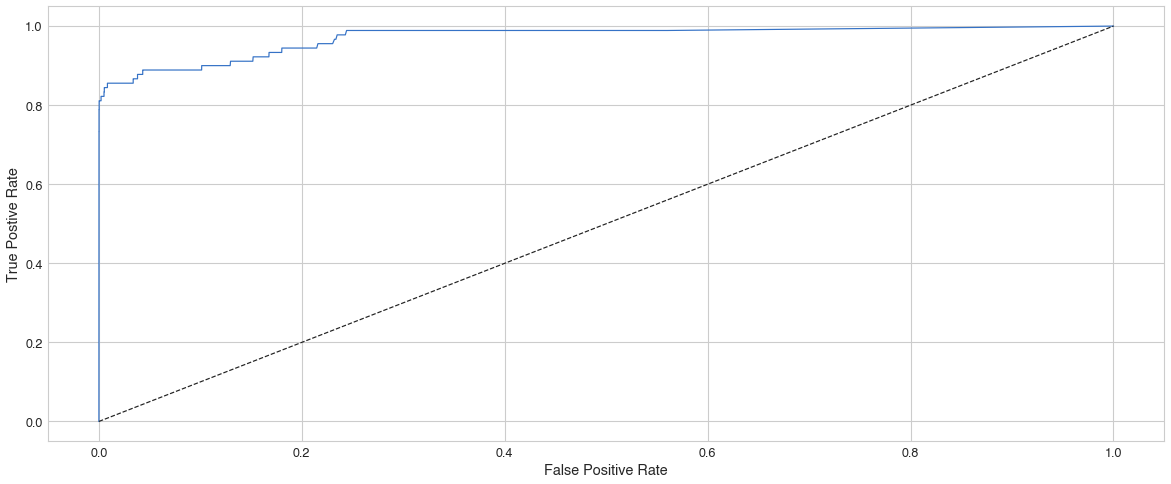

In [69]:
# roc curve 
from sklearn.metrics import roc_curve
fpr, tpr, thresholds= roc_curve(y_test,probs_xgb)

# plot roc curve 
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate')
plt.plot([0,1], [0,1], "k--");

### Score Overview

In [66]:
#tuned scores overview on test set
sorted(
    [('logreg', best_score_logreg),
    ('xgb_clf', best_score_xgb)
    ],
    key=itemgetter(1),
    reverse=True
)

[('logreg', 0.9763669239700021), ('xgb_clf', 0.9714182473563652)]

# Conclusion 

We run through different classification estimators. Logistic Regression along with XGBOOST Classifier performed well on this use case. 
After tuning different hyperparameters of both models, we have a winner : 
- Logistic Regression: 
  - best estimator: LogisticRegression(C=0.0006951927961775605, class_weight='balanced',
                   max_iter=1000) 
  - with roc_auc of nearly 98% on test set (97% on validation split set) 

In [70]:
#save model
from joblib import dump, load
dump(best_logreg, 'final_logreg_credit_card_fraud.joblib')

['final_logreg_credit_card_fraud.joblib']